In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from fbprophet import Prophet
from datetime import datetime

In [2]:
path = "c:/Windows/Fonts/malgun.ttf"
import platform
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

In [3]:
!pip install yfinance --upgrade --no-cache-dir

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22414 sha256=b7ea5a6a2af3b3d9a29e7e39ab1bf77dcb424b727f0911dfe1e79f6422bcf7cd
  Stored in directory: C:\Users\ADMINI~1\AppData\Local\Temp\pip-ephem-wheel-cache-cgdwd4v5\wheels\f9\e3\5b\ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
  Created wheel for multitasking: filename=multitasking-0.0.9-cp37-none-any.whl size=8373 sha256=8c6949c7996a25b274d5cd9c728f95ebb55a105c92bcb308db0c2101e11bb223
  Stored in directory: C:\Users\ADMINI~1\AppData\Local\Temp\pip-ephem-wheel-cache-cgdwd4v5\wheels\37\fa\73\d492849e319038eb4d986f5152e4b19ffb1bc0639da84d2677
Successfully built yfinance multitasking


# yahoo 사이트의 finance 카테고리를 연결해서 주식 데이터를 얻을 수 있는 라이브러리

In [5]:
import yfinance as yf

In [7]:
from pandas_datareader import data
# 데이터를 야후 등의 사이트에서 바로 받아 볼 수 있는 기능을 가진 라이브러리

In [8]:
yf.pdr_override() # yahoo finace 에 연결하기 위한 초기화 작업

In [19]:
start_date ='1990-1-1'
end_date='2020-07-20'

In [20]:
KIA = data.get_data_yahoo('035720.KS',start_date,end_date)

[*********************100%***********************]  1 of 1 completed


In [21]:
KIA.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-02-11,273000.0,273000.0,273000.0,273000.0,258278.734375,55300
2000-02-14,264000.0,298000.0,240500.0,247000.0,233680.750000,1254100
2000-02-15,250000.0,259000.0,217500.0,217500.0,205771.531250,648600
2000-02-16,210000.0,243500.0,200000.0,243500.0,230369.500000,871400
2000-02-17,246000.0,267500.0,235000.0,243500.0,230369.500000,1019800


In [23]:
KIA.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-13,359000.0,361000.0,345000.0,352000.0,352000.0,1391744
2020-07-14,340500.0,346500.0,340000.0,343000.0,343000.0,1212519
2020-07-15,344000.0,349500.0,332000.0,337500.0,337500.0,1487417
2020-07-16,332000.0,335500.0,319000.0,322000.0,322000.0,1941508
2020-07-17,319000.0,327000.0,314000.0,325000.0,325000.0,1268587


<AxesSubplot:xlabel='Date'>

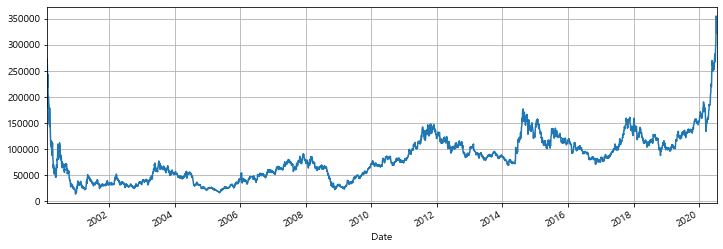

In [27]:
KIA['Close'].plot(figsize=(12,4),grid=True)

In [28]:
Tesla = data.get_data_yahoo('TSLA',start_date,end_date)

[*********************100%***********************]  1 of 1 completed


In [29]:
Tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [30]:
Tesla.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-13,1659.000000,1794.989990,1471.109985,1497.060059,1497.060059,38985400
2020-07-14,1556.000000,1590.000000,1431.000000,1516.800049,1516.800049,23418100
2020-07-15,1543.000000,1550.000000,1457.000000,1546.010010,1546.010010,16367800
2020-07-16,1477.160034,1531.709961,1466.000000,1500.640015,1500.640015,14300800
2020-07-17,1513.449951,1537.510010,1490.000000,1500.839966,1500.839966,9330000


<AxesSubplot:xlabel='Date'>

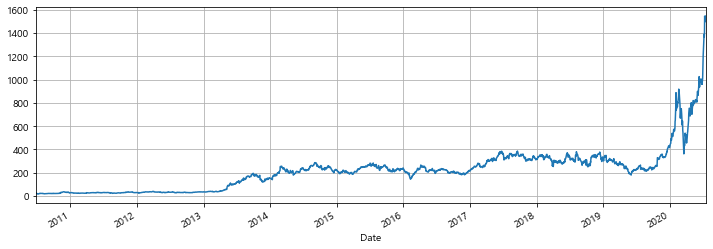

In [33]:
Tesla['Close'].plot(figsize=(12,4),grid=True)

In [34]:
# facebook 의 예측 모델로 사용하려면 2가지를 해야한다,
# 날짜가 들어간 열이름을 ds로, 예측값이 들어간 열이름을 y로 설정한다.
#데이터 프레임으로 만들어주어야함

In [43]:

Tesla_trunc = Tesla[:'2020-07-20']
Tesla_trunc

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...
2020-07-13,1659.000000,1794.989990,1471.109985,1497.060059,1497.060059,38985400
2020-07-14,1556.000000,1590.000000,1431.000000,1516.800049,1516.800049,23418100
2020-07-15,1543.000000,1550.000000,1457.000000,1546.010010,1546.010010,16367800


In [44]:
df = pd.DataFrame({'ds':Tesla_trunc.index, 'y':Tesla_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']
df.head()

,ds,y
0,2010-06-29,23.889999
1,2010-06-30,23.830000
2,2010-07-01,21.959999
3,2010-07-02,19.200001
4,2010-07-06,16.110001


In [45]:
m = Prophet(daily_seasonality=True)
m.fit(df);

In [46]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
2891,2021-07-13
2892,2021-07-14
2893,2021-07-15
2894,2021-07-16
2895,2021-07-17


In [47]:
forecast = m.predict(future)

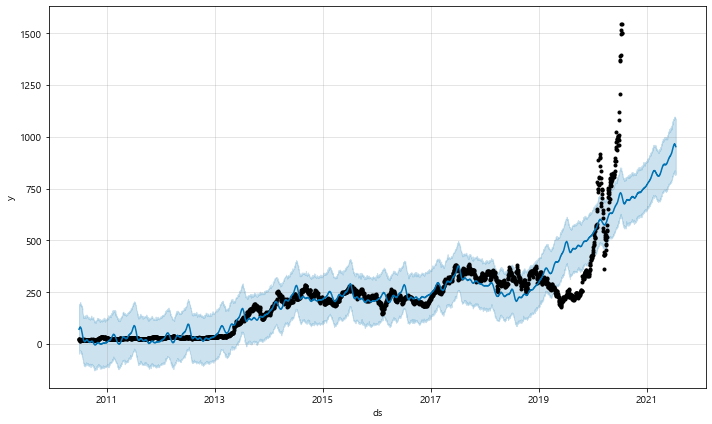

In [48]:
m.plot(forecast);

# 아마존

In [49]:
aws = data.get_data_yahoo('AMZN',start_date,end_date)

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

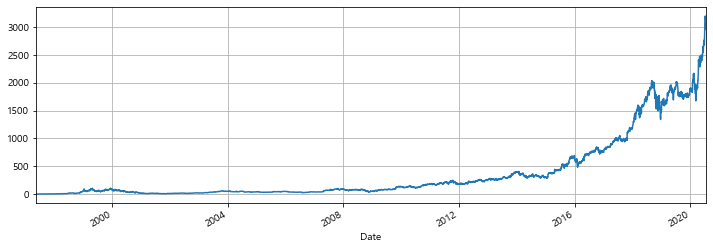

In [50]:
aws['Close'].plot(figsize=(12,4),grid=True)

In [51]:
aws_trunc = aws[:'2020-07-20']
aws_trunc

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200
...,...,...,...,...,...,...
2020-07-13,3251.060059,3344.290039,3068.389893,3104.000000,3104.000000,7720400
2020-07-14,3089.000000,3127.379883,2950.000000,3084.000000,3084.000000,7231900
2020-07-15,3080.229980,3098.350098,2973.179932,3008.870117,3008.870117,5788900


In [52]:
df = pd.DataFrame({'ds':aws_trunc.index, 'y':aws_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']
df.head()

,ds,y
0,1997-05-15,1.958333
1,1997-05-16,1.729167
2,1997-05-19,1.708333
3,1997-05-20,1.635417
4,1997-05-21,1.427083


In [53]:
m = Prophet(daily_seasonality=True)
m.fit(df);

In [54]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
6192,2021-07-13
6193,2021-07-14
6194,2021-07-15
6195,2021-07-16
6196,2021-07-17


In [55]:
forecast = m.predict(future)

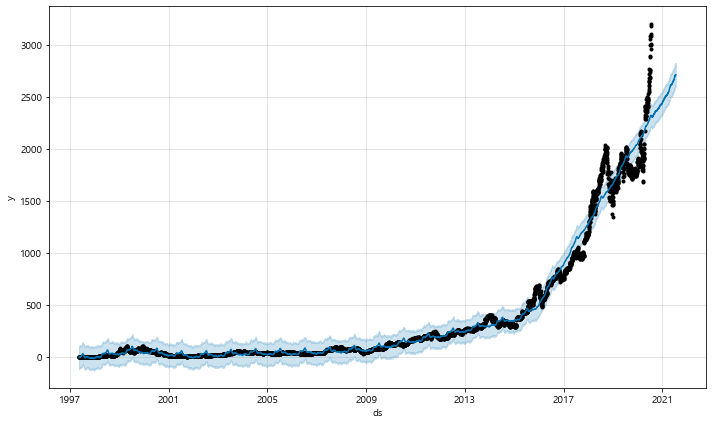

In [56]:
m.plot(forecast);